In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os


# Hawaii 2020 VEST File

In [2]:
gdfv = gpd.read_file('./raw-from-source/hi_2020/hi_2020.shp')
gdfv.head()

,COUNTYFP,STATEFP,PRECINCT,GEOID,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PRECBLA,G20PREOPIE,geometry
0,001,15,07-03,150010703,2246,873,41,33,4,3,"POLYGON ((-155.78978 20.24791, -155.78975 20.2..."
1,001,15,01-05,150010105,1050,330,14,12,0,1,"POLYGON ((-155.11901 19.88276, -155.11887 19.8..."
2,001,15,01-01,150010101,1415,582,21,21,7,4,"POLYGON ((-155.69903 20.18606, -155.69865 20.1..."
3,001,15,01-02,150010102,542,207,6,5,1,0,"POLYGON ((-155.40968 20.07713, -155.40942 20.0..."
4,001,15,01-06,150010106,794,308,16,9,1,4,"POLYGON ((-155.13126 19.82529, -155.13104 19.8..."


In [3]:
gdfv.PRECINCT.nunique()

262

# State Precinct Shapefile

In [4]:
shp = gpd.read_file('./raw-from-source/Election_Precincts_/Election_Precincts_.shp')
shp.head()

,objectid,dp,dpnum,dptype,county,zeropop,ballottype,us_house,state_hous,state_sena,county_cou,st_areasha,st_perimet,geometry
0,1,07-03,703,PP,HAWAII,None,CD2-H07-S04-CC9,CD2,H7,S4,CC9,3.433163e+08,100748.260922,"POLYGON ((-155.78978 20.24791, -155.78975 20.2..."
1,2,01-05,105,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,1.434849e+08,75515.354158,"POLYGON ((-155.11901 19.88276, -155.11887 19.8..."
2,3,01-01,101,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,3.771898e+08,141411.346571,"POLYGON ((-155.69903 20.18606, -155.69865 20.1..."
3,4,01-02,102,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,2.207124e+08,69022.641881,"POLYGON ((-155.40968 20.07713, -155.40942 20.0..."
4,5,01-06,106,PP,HAWAII,None,CD2-H01-S04-CC1,CD2,H1,S4,CC1,1.087545e+08,72825.893157,"POLYGON ((-155.13126 19.82529, -155.13104 19.8..."


In [5]:
print('prec ids in shp not in vest: ', set(shp['dp'])-set(gdfv.PRECINCT))
print('prec ids in vest not in shp: ', set(gdfv.PRECINCT) - set(shp['dp']))

prec ids in shp not in vest:  set()
prec ids in vest not in shp:  set()


# State Precinct Election Results

In [6]:
df = pd.read_csv('./raw-from-source/hi_2020_election_results.txt', delimiter = ',')
df.head()

,Precinct_Name,Split_Name,precinct_splitId,Reg_voters,Ballots,Reporting,Contest_id,Contest_title,Contest_party,Choice_id,Candidate_name,Choice_party,Candidate_Type,Absentee_votes,Early_votes,Election_Votes
0,01-01,NaN,1,3052,2079,1,1,President and Vice President,NaN,1,(C) BLANKENSHIP / MOHR,NaN,C,0,0,7
1,01-01,NaN,1,3052,2079,1,1,President and Vice President,NaN,2,(D) BIDEN / HARRIS,NaN,C,0,26,1389
2,01-01,NaN,1,3052,2079,1,1,President and Vice President,NaN,3,(G) HAWKINS / WALKER,NaN,C,0,0,21
3,01-01,NaN,1,3052,2079,1,1,President and Vice President,NaN,4,(L) JORGENSEN / COHEN,NaN,C,0,3,18
4,01-01,NaN,1,3052,2079,1,1,President and Vice President,NaN,5,(R) TRUMP / PENCE,NaN,C,0,38,544


In [7]:
df['Candidate_name'][df['Contest_id']==1].value_counts()

(L) JORGENSEN / COHEN     251
(G) HAWKINS / WALKER      251
(R) TRUMP / PENCE         251
(C) BLANKENSHIP / MOHR    251
(AS) PIERCE / BALLARD     251
(D) BIDEN / HARRIS        251
Name: Candidate_name, dtype: int64

In [8]:
print('in shp not in df: ', set(shp['dp']) - set(df['Precinct_Name']))
print('in df not in shp: ', set(df['Precinct_Name']) - set(shp['dp']))

in shp not in df:  {'05-11', '04-05', '35-07', '05-09', '07-06', '45-06', '01-11', '37-05', '07-07', '31-06', '01-10', '05-10'}
in df not in shp:  {'Presidential'}


In [9]:
#Check precincts not in election results
gdfv[gdfv.PRECINCT.isin(list(set(shp['dp']) - set(df['Precinct_Name'])))]

,COUNTYFP,STATEFP,PRECINCT,GEOID,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PRECBLA,G20PREOPIE,geometry
39,001,15,07-06,150010706,0,0,0,0,0,0,"POLYGON ((-155.81393 19.70189, -155.78874 19.6..."
41,001,15,01-11,150010111,0,0,0,0,0,0,"POLYGON ((-155.55025 19.98017, -155.55015 19.9..."
42,001,15,01-10,150010110,0,0,0,0,0,0,"POLYGON ((-155.43905 19.90429, -155.43883 19.9..."
43,001,15,04-05,150010405,0,0,0,0,0,0,"POLYGON ((-155.23844 19.41583, -155.23067 19.4..."
44,001,15,05-09,150010509,0,0,0,0,0,0,"POLYGON ((-155.48324 19.69085, -155.48258 19.6..."
45,001,15,05-10,150010510,0,0,0,0,0,0,"POLYGON ((-155.34540 19.59619, -155.34531 19.5..."
46,001,15,05-11,150010511,0,0,0,0,0,0,"POLYGON ((-155.51167 19.66242, -155.51384 19.6..."
48,001,15,07-07,150010707,0,0,0,0,0,0,"POLYGON ((-155.60890 19.83873, -155.60866 19.8..."
236,003,15,31-06,150033106,0,0,0,0,0,0,"POLYGON ((-157.93265 21.37608, -157.93243 21.3..."
239,003,15,35-07,150033507,0,0,0,0,0,0,"POLYGON ((-157.89095 21.48208, -157.89099 21.4..."


Notice that missing precincts from election results compared to shp are all zero-vote precincts

In [10]:
#Limit to president office because that is all that is in VEST file
df = df[(df['Contest_title'] == 'President and Vice President')]

df.loc[df['Contest_id']==1, 'race'] = 'PRE'

df['party'] = df['Candidate_name'].str.slice(start=1,stop=2)
df.loc[df['party'] == 'A', 'party'] = 'O'
df['short_name'] = df['Candidate_name'].str.slice(start=4, stop=7)
df.loc[df['short_name'] == ' PI', 'short_name'] = 'PIE'
df['column_header'] = 'G20' + df['race']+df['party']+df['short_name']

df['column_header'].value_counts()

G20PRELJOR    251
G20PREDBID    251
G20PRECBLA    251
G20PREOPIE    251
G20PREGHAW    251
G20PRERTRU    251
Name: column_header, dtype: int64

In [11]:
set(gdfv.columns) - set(df['column_header'])

{'COUNTYFP', 'GEOID', 'PRECINCT', 'STATEFP', 'geometry'}

In [12]:
df['vote_total'] = df['Absentee_votes'] + df['Early_votes'] + df['Election_Votes']
df.head()

,Precinct_Name,Split_Name,precinct_splitId,Reg_voters,Ballots,Reporting,Contest_id,Contest_title,Contest_party,Choice_id,...,Choice_party,Candidate_Type,Absentee_votes,Early_votes,Election_Votes,race,party,short_name,column_header,vote_total
0,01-01,NaN,1,3052,2079,1,1,President and Vice President,NaN,1,...,NaN,C,0,0,7,PRE,C,BLA,G20PRECBLA,7
1,01-01,NaN,1,3052,2079,1,1,President and Vice President,NaN,2,...,NaN,C,0,26,1389,PRE,D,BID,G20PREDBID,1415
2,01-01,NaN,1,3052,2079,1,1,President and Vice President,NaN,3,...,NaN,C,0,0,21,PRE,G,HAW,G20PREGHAW,21
3,01-01,NaN,1,3052,2079,1,1,President and Vice President,NaN,4,...,NaN,C,0,3,18,PRE,L,JOR,G20PRELJOR,21
4,01-01,NaN,1,3052,2079,1,1,President and Vice President,NaN,5,...,NaN,C,0,38,544,PRE,R,TRU,G20PRERTRU,582


In [13]:
#Pivot election results to match vest file formatting and shp to enable join
df_pivot = df.pivot_table(index = ['Precinct_Name'],
                          columns = ['column_header'],
                          values = ['vote_total'],
                          aggfunc = 'sum')

df_pivot.reset_index(inplace = True)

df_pivot.head()

Precinct_Name vote_total                                   \
column_header               G20PRECBLA G20PREDBID G20PREGHAW G20PRELJOR   
0                     01-01          7       1415         21         21   
1                     01-02          1        542          5          6   
2                     01-03          1        579         11         11   
3                     01-04          0        186          3          4   
4                     01-05          0       1050         12         14   

                                     
column_header G20PREOPIE G20PRERTRU  
0                      4        582  
1                      0        207  
2                      2        211  
3                      2         67  
4                      1        330

In [14]:
df_pivot.columns

MultiIndex([('Precinct_Name',           ''),
            (   'vote_total', 'G20PRECBLA'),
            (   'vote_total', 'G20PREDBID'),
            (   'vote_total', 'G20PREGHAW'),
            (   'vote_total', 'G20PRELJOR'),
            (   'vote_total', 'G20PREOPIE'),
            (   'vote_total', 'G20PRERTRU')],
           names=[None, 'column_header'])

In [15]:
df_pivot.columns = ['Precinct_Name', 'G20PRECBLA', 'G20PREDBID', 'G20PREGHAW', 'G20PRELJOR', 'G20PREOPIE', 'G20PRERTRU']

df_pivot['PRECINCT'] = df_pivot['Precinct_Name'].astype(str)

df_pivot.head()

,Precinct_Name,G20PRECBLA,G20PREDBID,G20PREGHAW,G20PRELJOR,G20PREOPIE,G20PRERTRU,PRECINCT
0,01-01,7,1415,21,21,4,582,01-01
1,01-02,1,542,5,6,0,207,01-02
2,01-03,1,579,11,11,2,211,01-03
3,01-04,0,186,3,4,2,67,01-04
4,01-05,0,1050,12,14,1,330,01-05


In [16]:
len(set(gdfv['PRECINCT'])-set(df_pivot['PRECINCT']))

12

In [18]:
gdfv[gdfv['PRECINCT'].isin(set(gdfv['PRECINCT'])-set(shp['dp']))]

,COUNTYFP,STATEFP,PRECINCT,GEOID,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PRECBLA,G20PREOPIE,geometry


# Compare election result totals

In [20]:
column_list = ['G20PRECBLA', 'G20PREDBID', 'G20PREGHAW', 'G20PRELJOR', 'G20PREOPIE', 'G20PRERTRU']

In [21]:
#Total votes comparison
sum_var_1 = 0
sum_var_2 = 0
for i in column_list:
    sum_var_1 += np.sum(gdfv[i])
    sum_var_2 += np.sum(df_pivot[i])
print('vest sum: ', sum_var_1)
print('state sum: ', sum_var_2)

vest sum:  574469
state sum:  574469


In [22]:
#Race totals comparison
for race in column_list:
    diff_val = sum(gdfv[race])-sum(df_pivot[race])
    if diff_val != 0:
        print(race+": "+str(diff_val))
    else:
        print(race+": EQUAL - " + str(sum(gdfv[race])))

G20PRECBLA: EQUAL - 931
G20PREDBID: EQUAL - 366130
G20PREGHAW: EQUAL - 3822
G20PRELJOR: EQUAL - 5539
G20PREOPIE: EQUAL - 1183
G20PRERTRU: EQUAL - 196864


In [23]:
df_pivot = df_pivot.fillna(0)
#merge to check results preliminary
gdfv_df_merge = pd.merge(df_pivot, gdfv, on = 'PRECINCT', how = 'inner', suffixes = ('_x', '_y'))

In [24]:
#Precinct comparison
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff != 0):
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]['PRECINCT'])
                if (diff>max_diff):
                    max_diff = diff
                    #add line to check percent from total vote difference is
                    perc_diff_from_vest = (diff/df.iloc[j][right_Data])*100
                    print("New max diff is: ", str(max_diff))
                    print('% difference from VEST total is: ', str(perc_diff_from_vest))
                    print(df.iloc[j]['PRECINCT'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]['PRECINCT'])
        else:
            matching_rows +=1
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
        #add line for % of total vote that difference is
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 5")
    diff_list.sort()

In [25]:
validater_row (gdfv_df_merge, column_list)

There are  250  total rows
0  of these rows have election result differences
250  of these rows are the same

The max difference between any one shared column in a row is:  0
There are  0 precinct results with a difference greater than 5


# Join shp and df to replicate VEST

<AxesSubplot:>

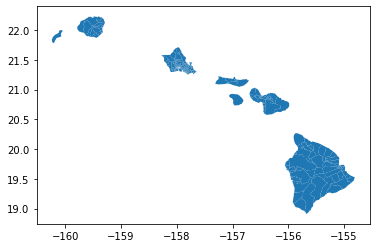

In [26]:
shp['PRECINCT'] = shp['dp']
shp.plot()

In [27]:
crs = gdfv.crs
shp = shp.to_crs(crs)

join = gpd.GeoDataFrame(pd.merge(df_pivot, shp, on = 'PRECINCT', how = 'outer'), crs = crs)

# Validation

## Shapefile

In [28]:
join_attempt_one = pd.merge(df_pivot,shp,how="outer",on="PRECINCT",indicator=True)
print(join_attempt_one["_merge"].value_counts())

both          250
right_only     12
left_only       1
Name: _merge, dtype: int64


In [29]:
join_attempt_one[join_attempt_one["_merge"]=='left_only']

,Precinct_Name,G20PRECBLA,G20PREDBID,G20PREGHAW,G20PRELJOR,G20PREOPIE,G20PRERTRU,PRECINCT,objectid,dp,...,zeropop,ballottype,us_house,state_hous,state_sena,county_cou,st_areasha,st_perimet,geometry,_merge
250,Presidential,0.0,0.0,0.0,0.0,0.0,0.0,Presidential,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,left_only


In [30]:
shp_final_merge = pd.merge(join, gdfv, on = 'PRECINCT', how = 'outer', suffixes = ['_x', '_y'],indicator=True)
join['geometry'].geom_almost_equals(gdfv['geometry'], decimal = 0)

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0      False
1      False
2      False
3      False
4      False
       ...  
258    False
259    False
260    False
261    False
262    False
Length: 263, dtype: bool

In [31]:
both = shp_final_merge[shp_final_merge["_merge"]=="both"]
source_geoms = gpd.GeoDataFrame(both,geometry="geometry_x",crs=gdfv.crs)
vest_geoms = gpd.GeoDataFrame(both,geometry="geometry_y",crs=gdfv.crs)
source_geoms = source_geoms.to_crs(gdfv.crs)
vest_geoms = vest_geoms.to_crs(gdfv.crs)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

True    262
dtype: int64


In [32]:
count = 0
area_list = []
big_diff = pd.DataFrame(columns=["area"])
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > 1):
        count += 1
        name = source_geoms.at[i,"Pct"]
        big_diff.loc[name]=area
        print(str(count)+") For " + name + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

<ipython-input-32-787353f6cb91>:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  area = float(diff.area/10e6)


In [33]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and 0.1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between 0.1 and 0.5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between 0.5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(262, 1)
262 precincts w/ a difference of 0 km^2
0 precincts w/ a difference between 0 and 0.1 km^2
0 precincts w/ a difference between 0.1 and 0.5 km^2
0 precincts w/ a difference between 0.5 and 1 km^2
0 precincts w/ a difference between 1 and 2 km^2
0 precincts w/ a difference between 2 and 5 km^2
0 precincts w/ a difference greater than 5 km^2
